In [ ]:
# Program for detecting ERA5 peaks
# Kexin Song
# 20190502 skx created

In [3]:
import datetime as dt
import numpy as np
from netCDF4 import Dataset
from scipy.signal import find_peaks
import pickle

In [4]:
def ReadData(filename):
    pkl_file = open(filename, 'rb')
    data = pickle.load(pkl_file)
    s_data = sorted(data.items(),key = lambda asd:asd[0])  # 字典排序
    lcca = []  # 低密集度指数 LCCA = Low Concentration in Central Arctic
    dates = []
    for j in s_data: 
        date = j[0]  # 获取日期
        dates.append(dt.datetime.strptime(date,"%Y%m%d"))
        lcca.append(j[1][2])
    pkl_file.close()
    return dates, lcca

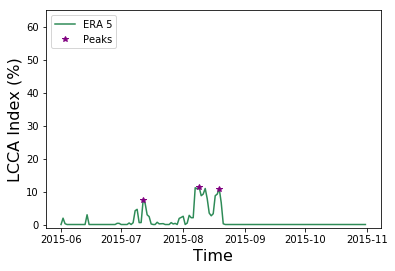

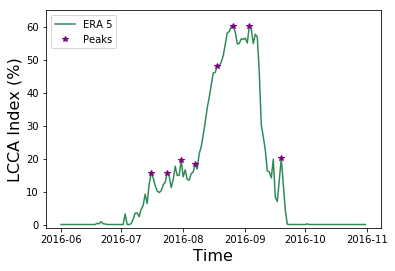

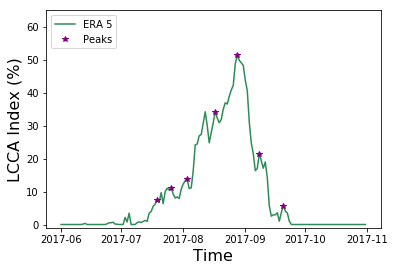

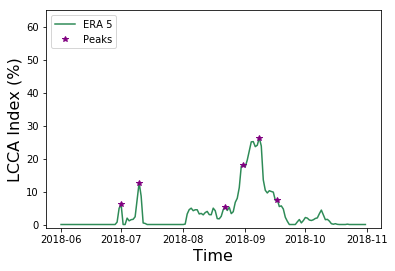

In [10]:
if __name__ == "__main__":

    FilePath = 'D:\\Newdata\\LCCA\\ERA5_75\\pkl\\'  # AMSR2 NT2 75
    SavePath = 'D:\\Newplot\\' 
    
    year = np.arange(2015,2019,1)
    for i in year:
        filename = FilePath+str(i)+"_LowArea_PubHole_75.pkl"
#     filename = FilePath+"2018_LowArea_PubHole_75.pkl"
    
        # Read LCCA data
        Dates,LCCA = ReadData(filename)    

        # Detect LCCA Peaks
        p_ind,_ = find_peaks(LCCA,height=5,distance=7)
        
        # Save Peaks info
        f = open(SavePath+str(i)+'_LCCA_Peak_ERA5.txt','w')
        
        for j in range (len(p_ind)):
            ind = p_ind[j]
            f.write('%10s %.2f'%(Dates[ind].date(),LCCA[ind]))
            f.write('\n')
#            print('%10s %f'%(date[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  
        f.close()

        # Plot
        LCCA = np.array(LCCA)    
        Dates = np.array(Dates)
        
        import matplotlib.pyplot as plt
        
        plt.plot(Dates,LCCA,'seagreen',label='ERA 5')
        plt.plot(Dates[p_ind],LCCA[p_ind],"*",color="purple",label="Peaks")
        
        plt.ylim(-1,65)
        
        plt.legend(loc=2)
        
        plt.xlabel("Time",fontsize=16)
        plt.ylabel("LCCA Index (%)",fontsize=16)

        plt.show()
        plt.savefig(SavePath+'LCCA_Peak_ERA5.jpg')
        plt.close()
        
        # Save as .txt

In [7]:

f.close()
# year = np.arange(2002,2019,1)
# print(year)

In [ ]:
##    '''Step2.1 Find LCCA Peak'''
        ## GitHub py-findpeaks 
        ## (https://github.com/MonsieurV/py-findpeaks)
        ## thres 幅度阈值
        ## min_dist 最小距离
        ## 输出：日期 峰值
        ''' '''
        import peakutils   
        LCCA = np.array(LCCA)
        Peak_Ind = peakutils.indexes(LCCA,thres=0.02/max(LCCA), min_dist=5)
        Peak_Value = LCCA[Peak_Ind]
        Peak_Ind_2 = Peak_Ind[Peak_Value>=1]
    
        for i in range (len(Peak_Ind_2)):
            ind = Peak_Ind_2[i]
            f.write('%10s %.2f'%(date[ind].date(),LCCA[ind]))
            f.write('\n')
#            print('%10s %f'%(date[ind].date(),LCCA[ind]))  # 输出：日期 峰值
        f.write('\n')
        print('\n')  